In [43]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import pickle
import tensorflow as tf



def calculate_and_log_training_time(modelname, start_time, end_time):
    training_duration = end_time - start_time
    # Print training duration in a human-readable format
    hours, rem = divmod(training_duration, 3600)
    minutes, seconds = divmod(rem, 60)
    
    filepath = modelname+"trainingtime.txt"
    with open(filepath, "w") as f:
        f.write(f"Training took {int(hours):02d}:{int(minutes):02d}:{seconds:02f} (hh:mm:ss).")



## runtime
def save_model_config_with_optimizer(model, modelname):
    filepath = modelname+"model_config.txt"
    with open(filepath, 'w') as f:
        # Save layer configurations
        for layer in model.layers:
            f.write(f"Layer: {layer.name}\n")
            f.write(f"Config: {layer.get_config()}\n\n")
        
        # Save optimizer configuration
        optimizer_config = model.optimizer.get_config()
        f.write("Optimizer Config:\n")
        f.write(str(optimizer_config))


def save_model(model, modelname):
    model.save(modelname+".keras")

def save_performance_metrics(history, modelname):
    filepath = modelname+'performance_metrics.csv'
    pd.DataFrame(history.history).to_csv(filepath)
    
    
    
def save_performance_graphs(model, metrics=['accuracy'], filepath_prefix='performance'):
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        plt.plot(model.history[metric], label=f'Training {metric}')
        val_metric = f'val_{metric}'
        if val_metric in model.history:
            plt.plot(model.history[val_metric], label=f'Validation {metric}')
        plt.title(f'Model {metric}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.savefig(f"{filepath_prefix}_{metric}.png")
        plt.close()
        
def plot_loss_and_metric(history, metric_name='accuracy', model_name='model'):
    """
    Plots the training and validation loss, and a performance metric from the training history, and saves the plots
    with the model name as a prefix. This version explicitly uses Figures and Axes for better control.

    Parameters:
    - history: Return value from model.fit().
    - metric_name: Name of the performance metric to plot (e.g., 'accuracy', 'mae').
    - model_name: Name of the model, used as a prefix for saving plot images.
    """

    # First plot: Training & validation loss values
    fig, ax = plt.subplots(figsize=(14, 6))  # Explicitly create a Figure and Axes
    ax.plot(history.history['loss'], label='Train Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title('Model Loss')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper right')
    ax.grid(True)  # Adding grid explicitly
    loss_plot_filename = f'{model_name}_loss_plot.jpg'
    fig.savefig(loss_plot_filename)
    print(f"Loss plot saved as: {loss_plot_filename}")
    plt.close(fig)  # Close the figure

    # Second plot: Training & validation performance metric
    fig, ax = plt.subplots(figsize=(14, 6))  # Again, explicitly create a Figure and Axes for the metric plot
    ax.plot(history.history[metric_name], label=f'Train {metric_name.capitalize()}')
    ax.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name.capitalize()}')
    ax.set_title(f'Model {metric_name.capitalize()}')
    ax.set_ylabel(metric_name.capitalize())
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper left')
    ax.grid(True)  # Adding grid explicitly
    metric_plot_filename = f'{model_name}_{metric_name}_plot.jpg'
    fig.savefig(metric_plot_filename)
    print(f"Metric plot saved as: {metric_plot_filename}")
    plt.close(fig)  # Close the figure to free up memory


def save_model_and_config_and_metrics(model, history, modelname = "model"):
    save_model_config_with_optimizer(model, modelname = modelname)
    save_model(model, modelname = modelname)
    save_performance_metrics(history, modelname = modelname)
    plot_loss_and_metric(history, metric_name='mae', model_name='model')
    

## Flow of modeling

In [ ]:
## setup model config

# Capture start time
start_time = time.time()
# fit the model

# Capture end time and calculate duration
end_time = time.time()
calculate_and_log_training_time(modelname = "model", start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model, modelname = "model")

##next model

## Data Import Grayscale

In [2]:
path = "C:/Users/marij/Documents/Universiteit_local/Master_Year1/DeepLearning/Part1_Processed_Grey.pkl"
# Open the pickle file in binary mode
with open(path, 'rb') as file:
    # Load the content of the file into a variable
    data = pickle.load(file)

In [3]:
data

,Age,Gender,Race,Image
0,16,1,3,"[[0.38431373, 0.37254903, 0.35686275, 0.341176..."
1,40,1,0,"[[0.67058825, 0.67058825, 0.6666667, 0.6666667..."
2,71,1,0,"[[0.6156863, 0.6392157, 0.7019608, 0.7607843, ..."
3,80,1,0,"[[0.57254905, 0.57254905, 0.57254905, 0.572549..."
4,21,0,4,"[[0.06666667, 0.05882353, 0.050980393, 0.05098..."
...,...,...,...,...
10130,53,0,0,"[[0.52156866, 0.5176471, 0.5176471, 0.52156866..."
10131,36,0,0,"[[0.69411767, 0.6901961, 0.68235296, 0.6705882..."
10132,1,0,2,"[[0.73333335, 0.73333335, 0.627451, 0.5058824,..."
10133,3,1,4,"[[0.5529412, 0.5568628, 0.56078434, 0.5647059,..."


In [4]:
sampled_data = data.sample(n=3)

## Flatten the Image array for non convelutional DNN

In [5]:
# Flatten each 2D array in the column
sampled_data['Image'] = sampled_data['Image'].apply(lambda x: x.flatten())

In [6]:
sampled_data

,Age,Gender,Race,Image
604,15,1,2,"[0.45490196, 0.4627451, 0.46666667, 0.4745098,..."
2294,21,1,2,"[0.18431373, 0.19607843, 0.21176471, 0.2196078..."
2020,41,1,3,"[0.08235294, 0.08627451, 0.09019608, 0.0901960..."


In [7]:
# Prepare the inputs and labels
X = np.stack(sampled_data['Image'].values)  # Converts a column of arrays into a single numpy array
y = sampled_data['Age'].values

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Example of good code

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 327.1910 - mae: 17.8291 - val_loss: 77.6151 - val_mae: 8.8099
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 1963.8339 - mae: 42.3069 - val_loss: 828.4713 - val_mae: 28.7832
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 11.3612 - mae: 3.2853 - val_loss: 1977.5050 - val_mae: 44.4691
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 512.6843 - mae: 22.2304 - val_loss: 1191.3500 - val_mae: 34.5159
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 106.6501 - mae: 10.2830 - val_loss: 440.2423 - val_mae: 20.9820
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 50.5458 - mae: 6.2085 - val_loss: 210.6190 - val_mae: 14.5127
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 227.0313 - mae: 14.0024 - val_loss: 305.9229 - val_mae: 17.4907
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 130.9780 - mae: 10.5114 - val_loss: 608.7330 - val_mae: 24.6725
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━

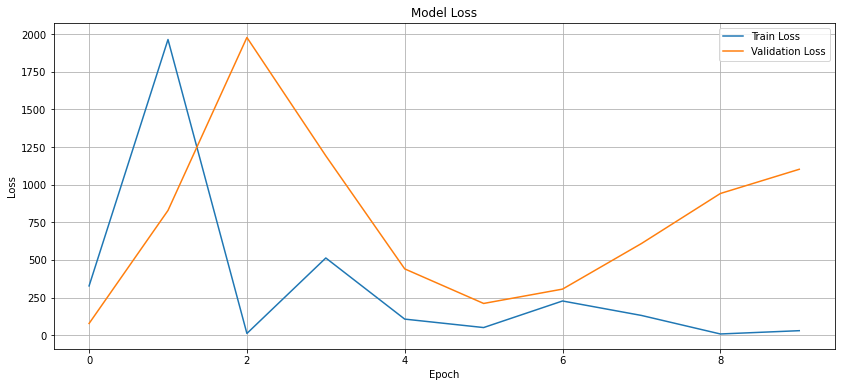

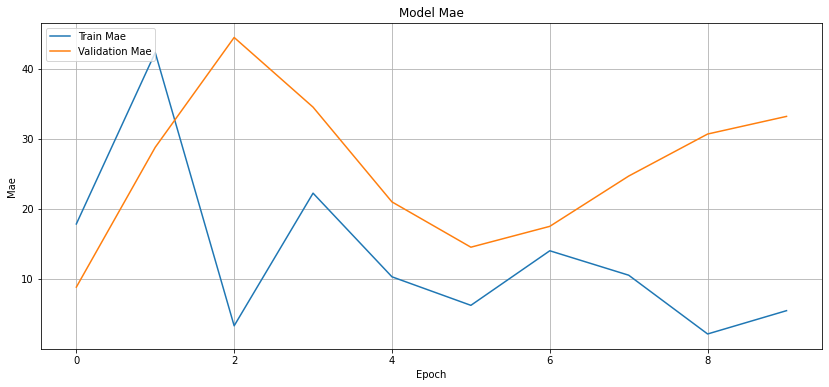

In [44]:
## setup model config
# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(65536,)),  # Define the input shape her
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Capture start time
start_time = time.time()
# fit the model
history = model.fit(X, y, epochs=10, validation_split=0.2)
# Capture end time and calculate duration
end_time = time.time()
calculate_and_log_training_time(modelname = "modelexample", start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model, history = history,  modelname = "modelexample")

##next model